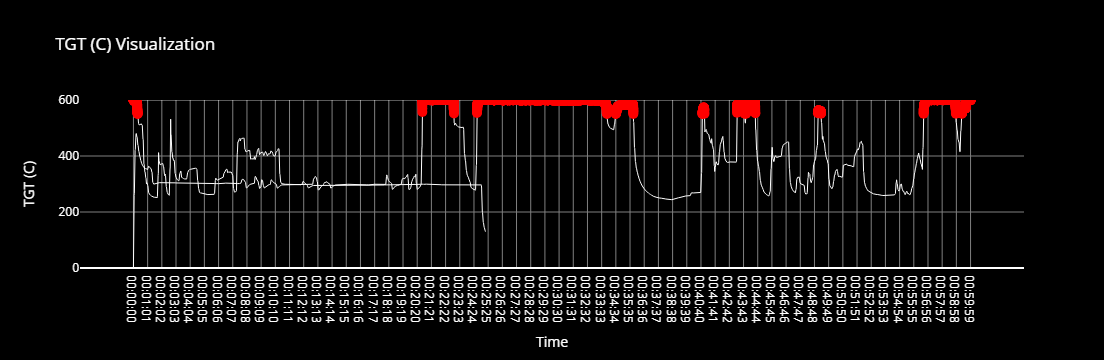

Violations occurred at 8467 points.


In [2]:
import pandas as pd
import plotly.graph_objs as go

# Read the CSV file
data = pd.read_csv('data_set.csv')

# Convert 'Time(hh)' column to datetime format
data['Time(hh)'] = pd.to_datetime(data['Time(hh)'], format='%M:%S.%f')

# Format time to exclude date and year
data['Time(hh)'] = data['Time(hh)'].dt.strftime('%H:%M:%S')

# Define violation thresholds
TGT_MAX = 570  # Max TGT allowed
TGT_VIOLATION_1 = 550  # TGT threshold for first violation
VIOLATION_DURATION = 10  # Duration in seconds for which TGT can exceed TGT_VIOLATION_1

# Check for violations
violations = []
for idx, row in data.iterrows():
    if row['TGT (C)'] > TGT_MAX:
        violations.append({'time': row['Time(hh)'], 'TGT': row['TGT (C)']})
    elif row['TGT (C)'] > TGT_VIOLATION_1:
        # Check if TGT exceeds TGT_VIOLATION_1 for more than VIOLATION_DURATION
        if data['TGT (C)'][idx:idx + VIOLATION_DURATION].max() > TGT_VIOLATION_1:
            violations.append({'time': row['Time(hh)'], 'TGT': row['TGT (C)']})

# Create and display TGT(C) plot
fig_tgt = go.Figure()
fig_tgt.add_trace(go.Scatter(x=data['Time(hh)'], y=data['TGT (C)'],
                              mode='lines',
                              line=dict(color='white', width=1),
                              name='TGT (C)'))

# Highlight violations
if violations:
    for violation in violations:
        fig_tgt.add_trace(go.Scatter(x=[violation['time']], y=[violation['TGT']],
                                     mode='markers',
                                     marker=dict(color='red', size=10),
                                     name='Violation'))

    violation_statement = f"Violations occurred at {len(violations)} points."
else:
    violation_statement = "No violations occurred."

fig_tgt.update_layout(
    title='TGT (C) Visualization',
    xaxis=dict(title='Time'),
    yaxis=dict(title='TGT (C)', range=[0, 600]),  # Adjust the range as needed
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    showlegend=False,
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    xaxis_gridcolor='gray',
    yaxis_gridcolor='gray'
)

fig_tgt.show()

print(violation_statement)

In [5]:
import pandas as pd
import plotly.graph_objs as go
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# Read the CSV file
data = pd.read_csv('data_set.csv')

# Convert 'Time(hh)' column to datetime format
data['Time(hh)'] = pd.to_datetime(data['Time(hh)'], format='%M:%S.%f')

# Format time to exclude date and year
data['Time(hh)'] = data['Time(hh)'].dt.strftime('%H:%M:%S')

# Define violation thresholds
TGT_MAX = 570  # Max TGT allowed
TGT_VIOLATION_1 = 550  # TGT threshold for first violation
VIOLATION_DURATION = 10  # Duration in seconds for which TGT can exceed TGT_VIOLATION_1

# Check for violations
violations = []
for idx, row in data.iterrows():
    if row['TGT (C)'] > TGT_MAX:
        violations.append({'time': row['Time(hh)'], 'TGT': row['TGT (C)']})
    elif row['TGT (C)'] > TGT_VIOLATION_1:
        # Check if TGT exceeds TGT_VIOLATION_1 for more than VIOLATION_DURATION
        if data['TGT (C)'][idx:idx + VIOLATION_DURATION].max() > TGT_VIOLATION_1:
            violations.append({'time': row['Time(hh)'], 'TGT': row['TGT (C)']})

# Create and display TGT(C) plot
fig_tgt = go.Figure()
fig_tgt.add_trace(go.Scatter(x=data['Time(hh)'], y=data['TGT (C)'],
                              mode='lines',
                              line=dict(color='white', width=1),
                              name='TGT (C)'))

# Highlight violations
if violations:
    for violation in violations:
        fig_tgt.add_trace(go.Scatter(x=[violation['time']], y=[violation['TGT']],
                                     mode='markers',
                                     marker=dict(color='red', size=10),
                                     name='Violation'))

    violation_statement = f"Violations occurred at {len(violations)} points."
else:
    violation_statement = "No violations occurred."

fig_tgt.update_layout(
    title='TGT (C) Visualization',
    xaxis=dict(title='Time'),
    yaxis=dict(title='TGT (C)', range=[0, 600]),  # Adjust the range as needed
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    showlegend=False,
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    xaxis_gridcolor='gray',
    yaxis_gridcolor='gray'
)

# Generate PDF with violation information
pdf_filename = 'TGT violations_report.pdf'
c = canvas.Canvas(pdf_filename, pagesize=letter)
c.setFont("Helvetica", 12)
c.drawString(100, 750, "Violations Report")

if violations:
    c.drawString(100, 730, f"Total Violations: {len(violations)}")
    c.drawString(100, 710, "Time\t\t\tTGT (C)")
    for violation in violations:
        c.drawString(100, 690 - (violations.index(violation) * 20), f"{violation['time']}\t\t{violation['TGT']}")
else:
    c.drawString(100, 730, "No violations occurred.")

c.save()

print(violation_statement)
print(f"Violations report saved as {pdf_filename}")


Violations occurred at 8467 points.
Violations report saved as TGT violations_report.pdf
